In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

from IPython.display import Image

C:\Users\김하나\AppData\Local\Temp\ipykernel_16192\1726710544.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
data = pd.read_csv("C:/Users/김하나/Desktop/인사이트/Session 4. EDA/train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 결측치 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Text(0.5, 1.0, 'number6')

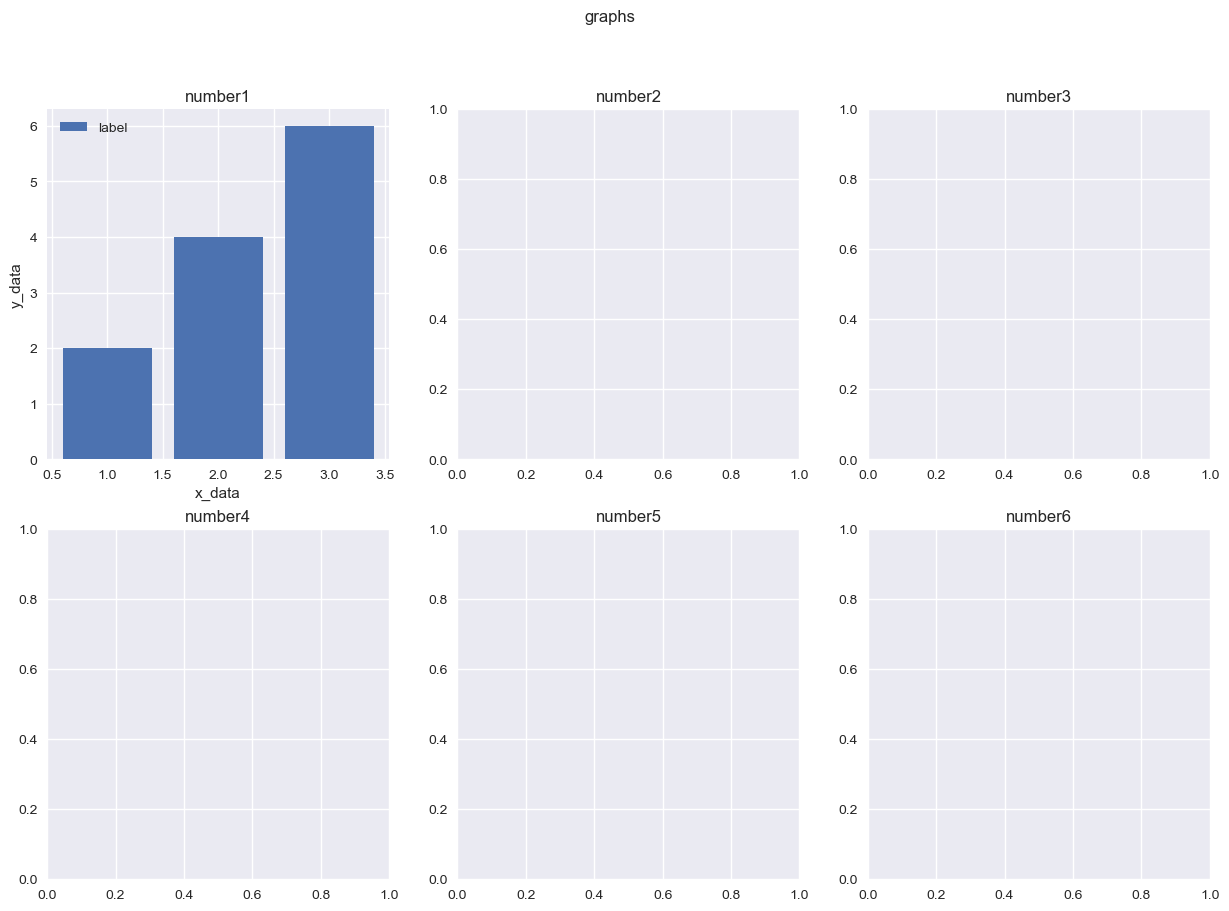

In [8]:
x = [1,2,3]
y = [2,4,6]
fig, ax = plt.subplots(2,3, figsize=(15,10))
fig.suptitle('graphs')

ax[0,0].bar(x, y, label='label')
ax[0,0].set_title('number1')
ax[0,0].legend()
ax[0,0].set(xlabel='x_data', ylabel='y_data')

ax[0,1].set_title('number2')
ax[0,2].set_title('number3')
ax[1,0].set_title('number4')
ax[1,1].set_title('number5')
ax[1,2].set_title('number6')

<Figure size 800x550 with 0 Axes>

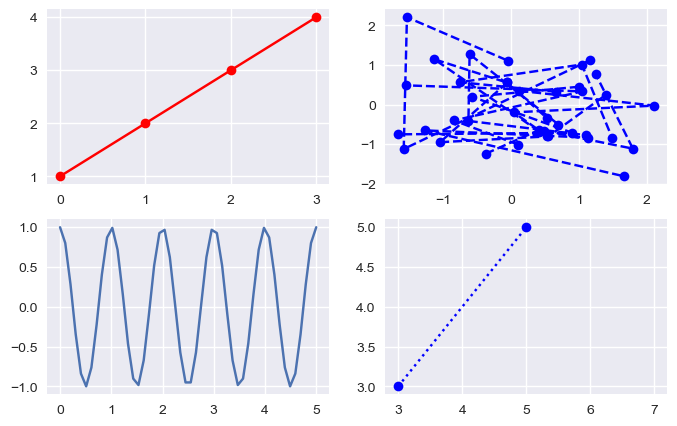

In [10]:
fig = plt.figure()
fig.suptitle('figure sample plots')

fig, ax_lst = plt.subplots(2,2,figsize=(8,5))

ax_lst[0][0].plot([1,2,3,4], 'ro-')
ax_lst[0][1].plot(np.random.randn(4,10), np.random.randn(4,10), 'bo--')
ax_lst[1][0].plot(np.linspace(0.0, 5.0), np.cos(2*np.pi*np.linspace(0.0, 5.0)))
ax_lst[1][1].plot([3,5], [3,5], 'bo:')
ax_lst[1][1].plot([3,7], [5,4], 'kx')
plt.show()

In [11]:
parameters = {
    'axes.titlesize': 25,
    'axes.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(parameters)

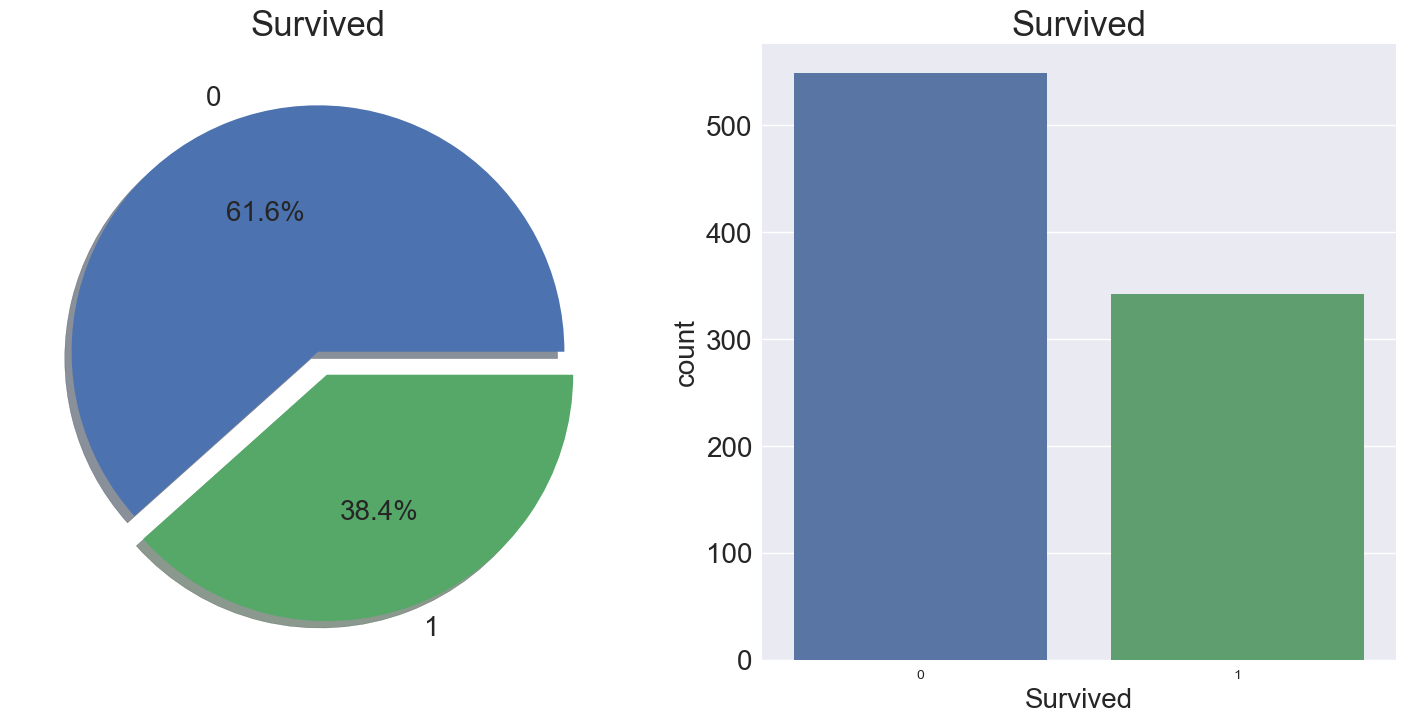

In [15]:
f, ax = plt.subplots(1,2,figsize=(18, 8))

data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct="%1.1f%%", 
                                         ax=ax[0],shadow = True,
                                        fontsize = 20)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [16]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

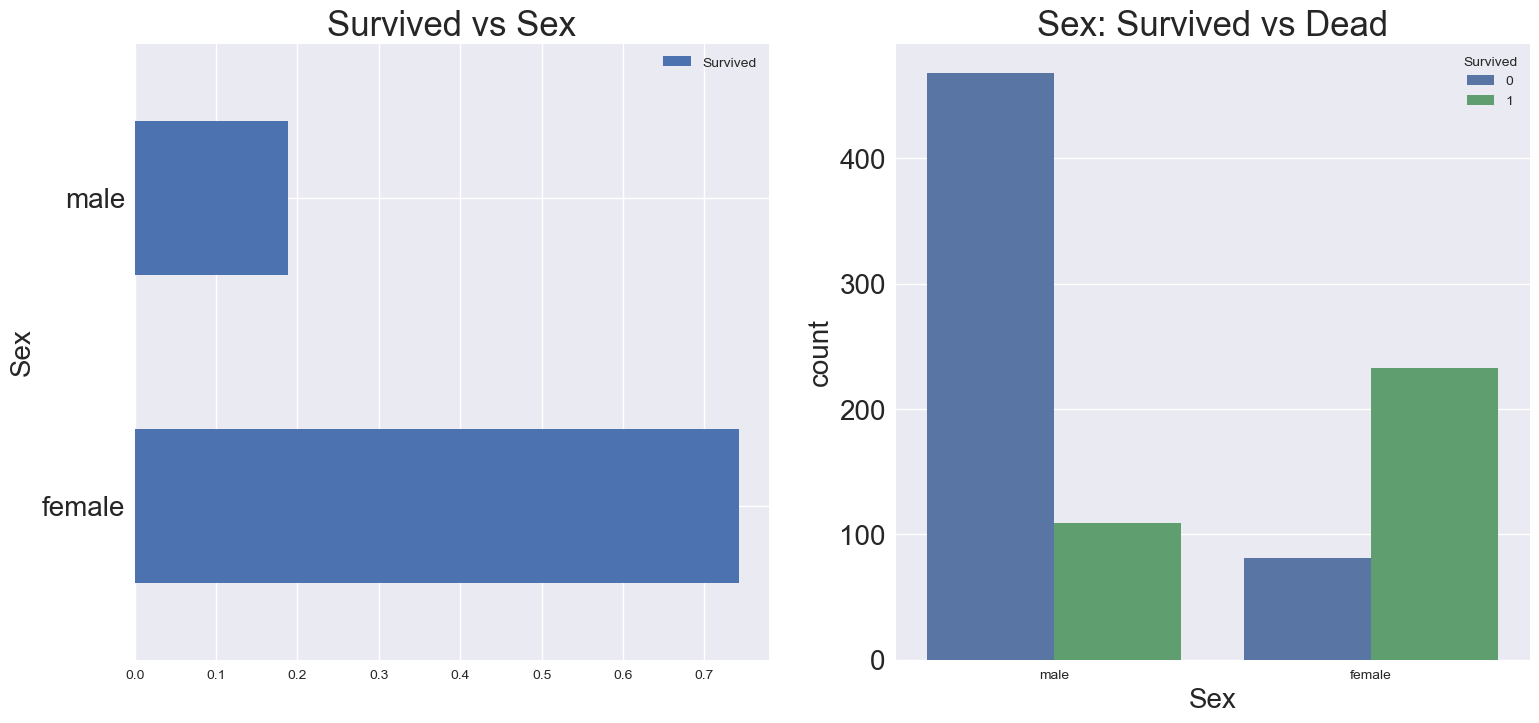

In [17]:
f, ax = plt.subplots(1,2,figsize=(18,8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.barh(ax=ax[0])
ax[0].set_title('Survived vs Sex')

# 세션때 쓴 거에서는 x= 안해도 되는데 여기선 해야함. 아마 sns 버전 때문인듯?
sns.countplot(x='Sex', hue='Survived', data = data, ax=ax[1])

ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [18]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


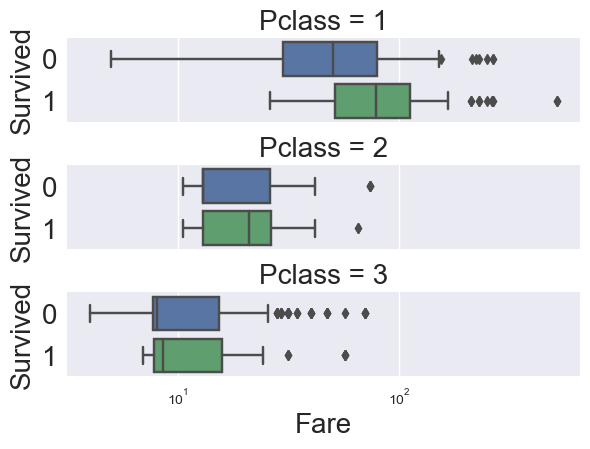

In [20]:
plot = sns.catplot(x="Fare", y="Survived", row="Pclass", kind="box",orient="h",
                  height=1.5, aspect=4, data=data.query("Fare > 0"))
plot.set(xscale="log");

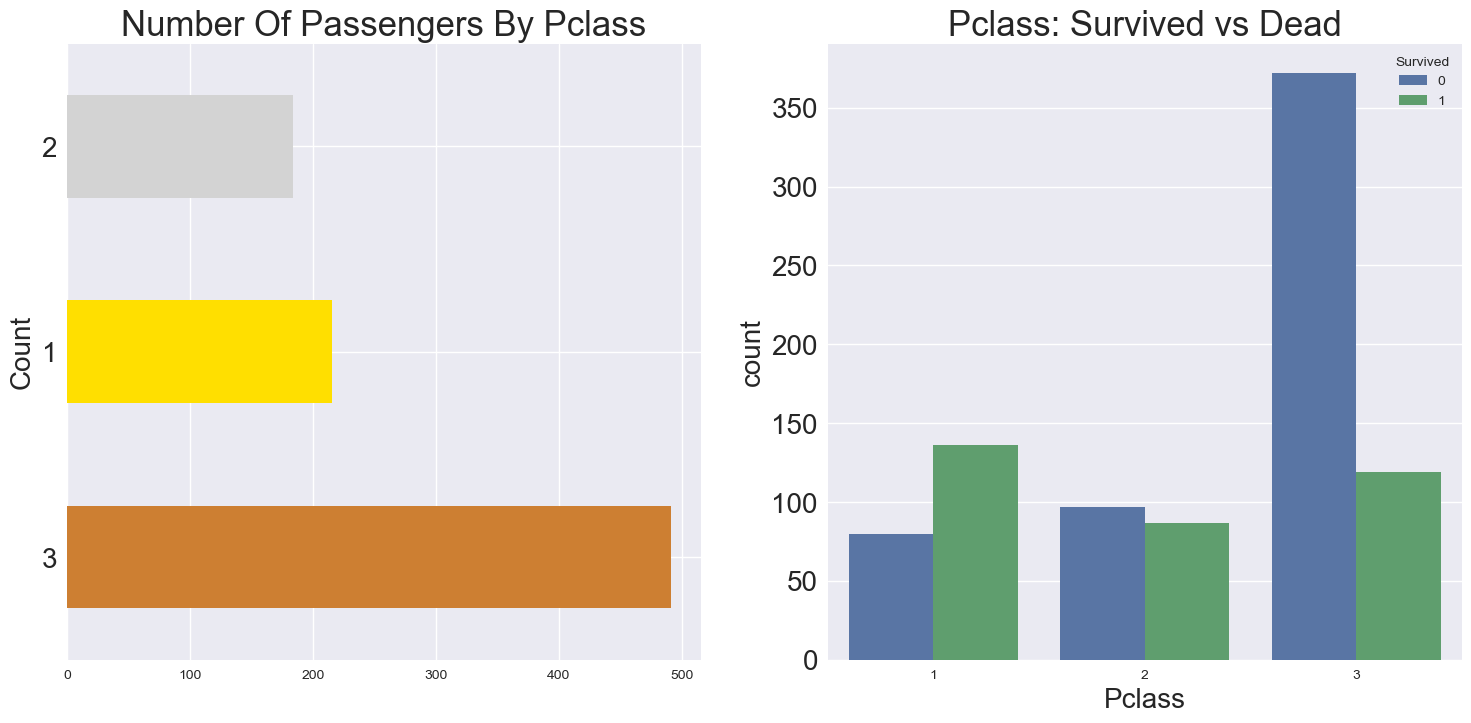

In [21]:
f, ax = plt.subplots(1,2,figsize=(18,8))

data['Pclass'].value_counts().plot.barh(
    color=['#CD7F32', "#FFDF00", "#D3D3D3"],  ax = ax[0])
ax[0].set_title("Number Of Passengers By Pclass")
ax[0].set_ylabel('Count')

sns.countplot(x="Pclass", hue="Survived", data = data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [22]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap="summer_r")

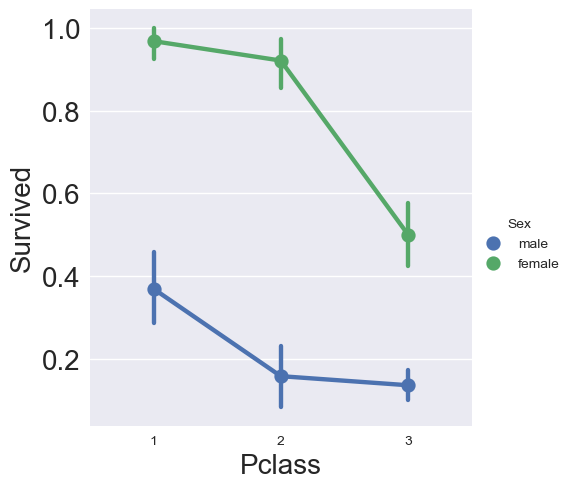

In [23]:
sns.catplot(x='Pclass', y="Survived", hue="Sex",  data = data, kind = 'point')
plt.show()

In [24]:
print("Oldest Passenger was of:", data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


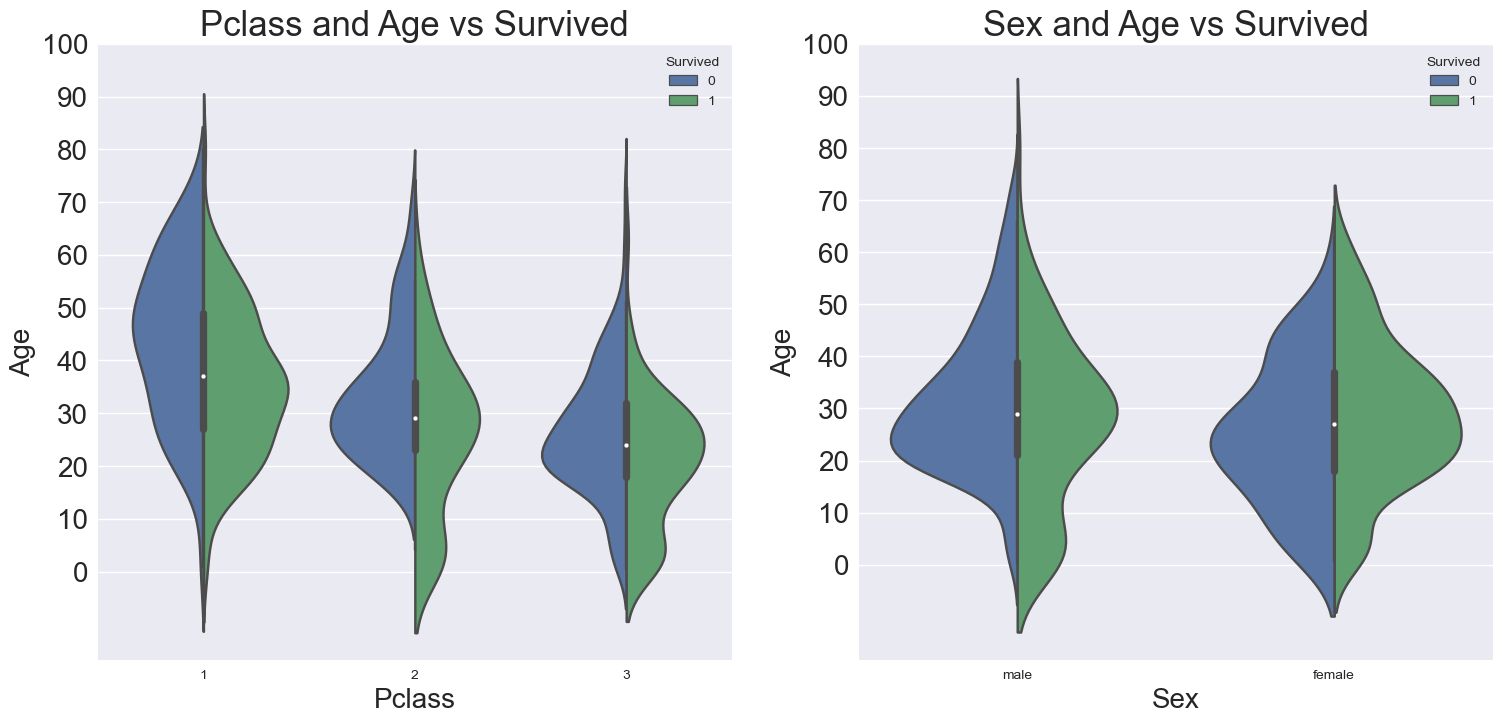

In [28]:
f, ax = plt.subplots(1,2, figsize = (18,8))

# 바이올린 플롯도 순서변경이 있었나봄 x= y= 해줘야함
sns.violinplot(x='Pclass', y='Age', hue = 'Survived', data=data, split=True, ax = ax[0])

ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x='Sex', y='Age', hue = 'Survived', data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [29]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [31]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [32]:
data['Initial'].replace([
    'Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col',
    'Rev', 'Capt', 'Sir', 'Don'], ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 
                                   'Mrs', 'Mrs', 'Other', 'Other',
    'Other', 'Mr', 'Mr', 'Mr'], inplace = True)

In [33]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [34]:
data.loc[(data.Age.isnull())&(data.Initial == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial == 'Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial == 'Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial == 'Other'), 'Age'] = 46

In [35]:
data.Age.isnull().any()

False

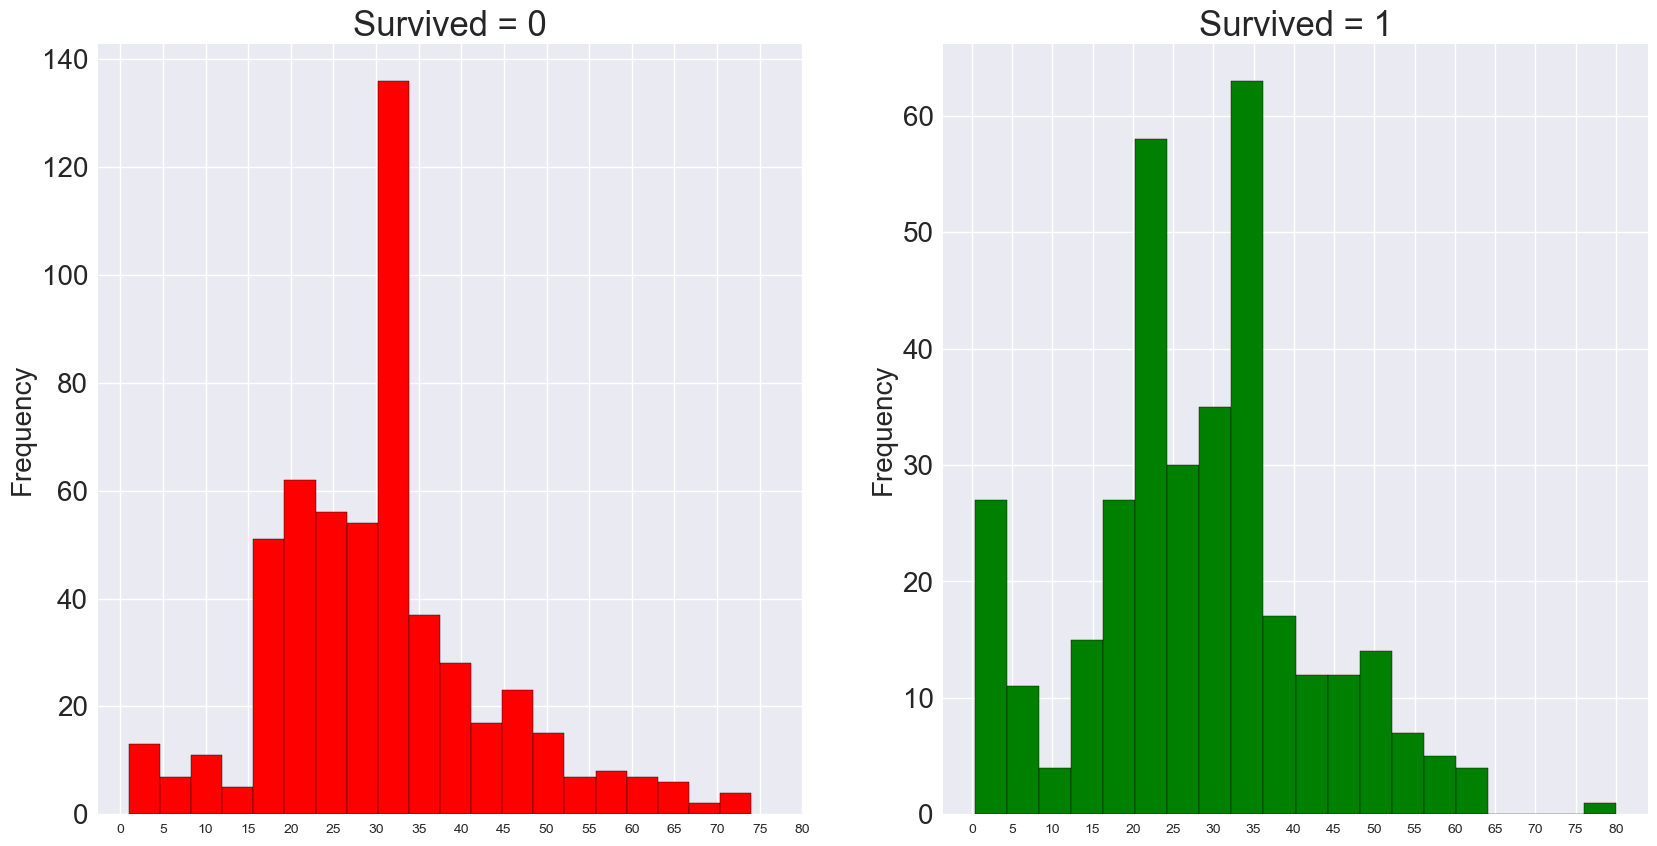

In [36]:
f, ax = plt.subplots(1,2,figsize=(20,10))

data[data['Survived']== 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'red')

ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')

ax[1].set_title('Survived = 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

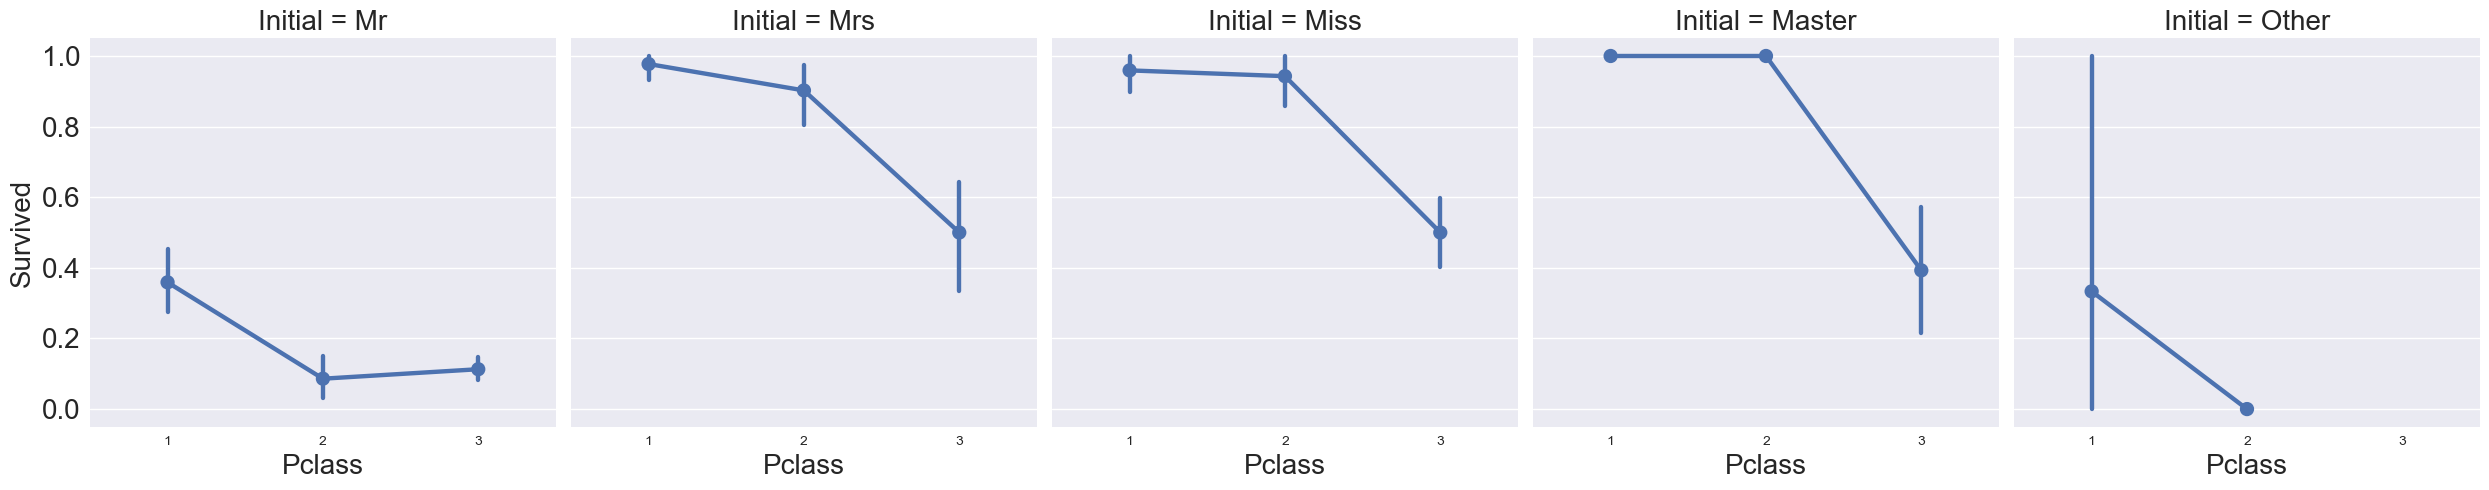

In [38]:
sns.catplot(x='Pclass', y='Survived', col='Initial', kind = 'point', data = data)
plt.show()

In [39]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap='summer_r')

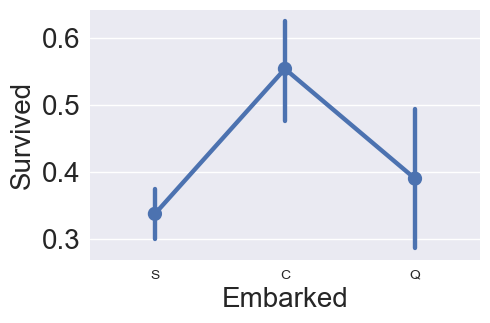

In [41]:
sns.catplot(x='Embarked', y='Survived', data = data, kind='point')
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

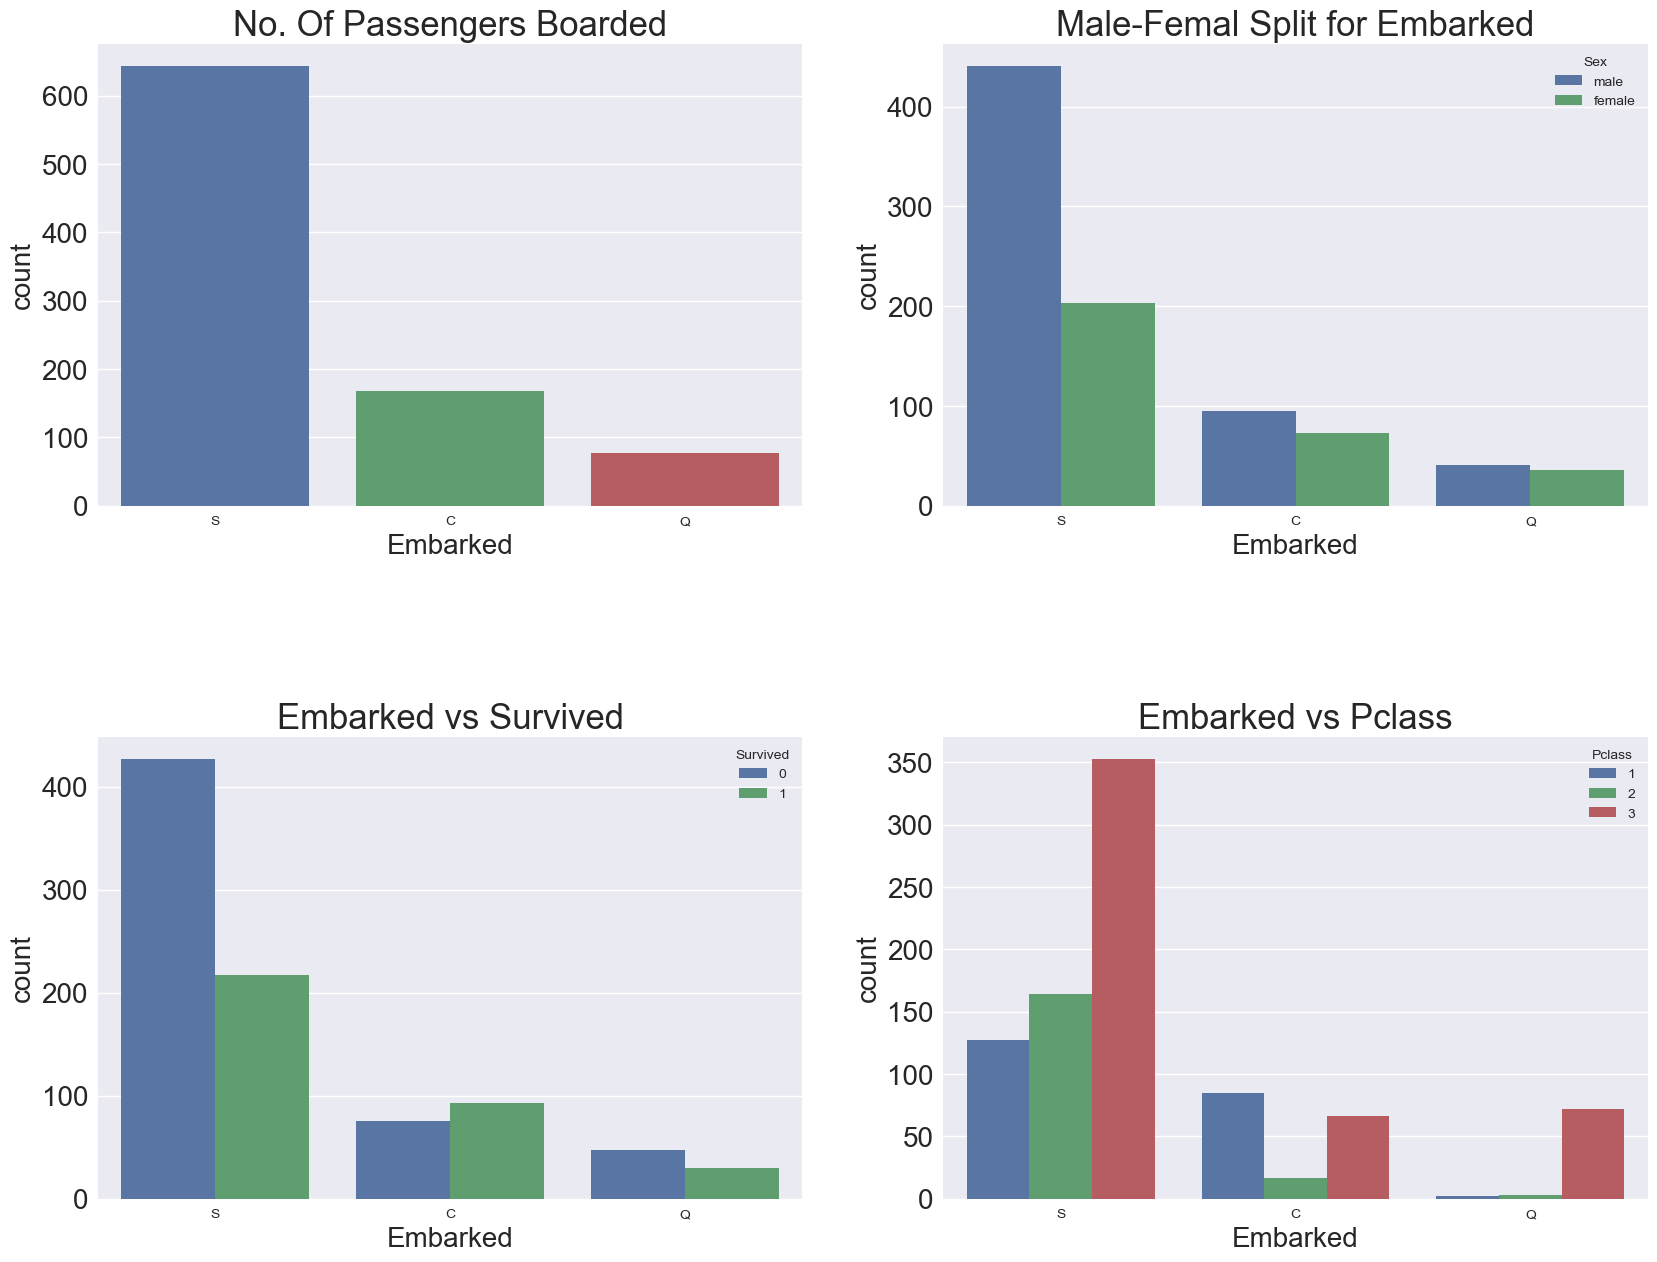

In [43]:
f, ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot(x='Embarked', data=data, ax = ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Femal Split for Embarked')

sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


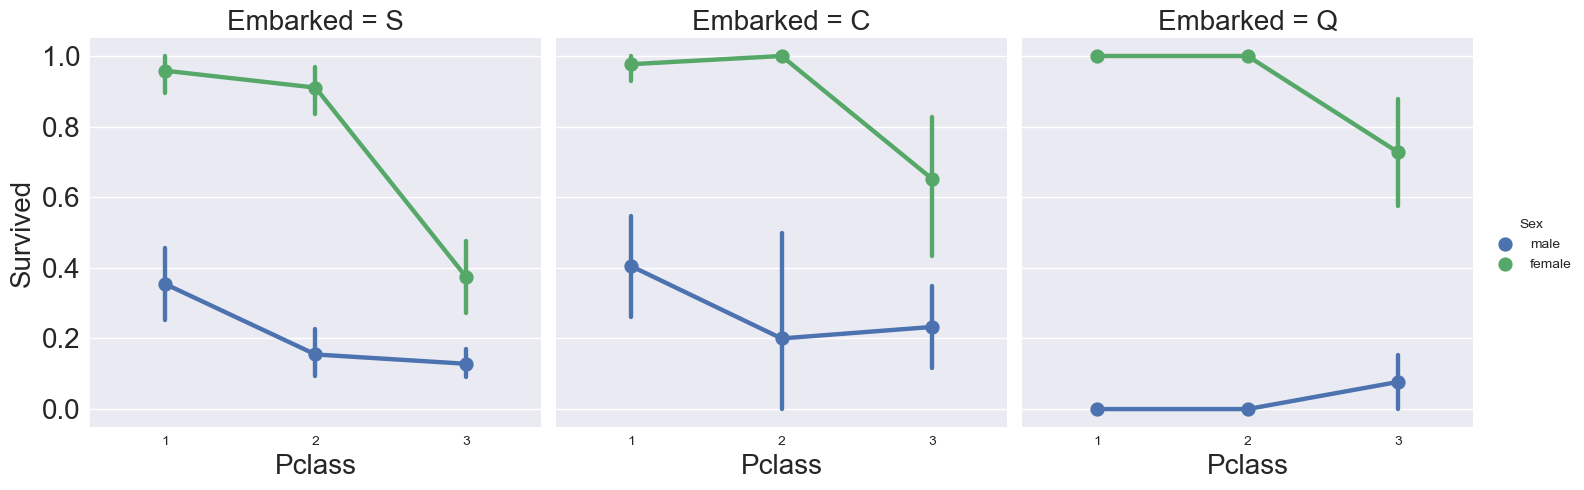

In [47]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data = data, kind='point')
plt.show()

In [48]:
data['Embarked'].fillna('S', inplace = True)

In [49]:
data.Embarked.isnull().any()

False

In [50]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5, 1.0, 'SibSp vs Survived')

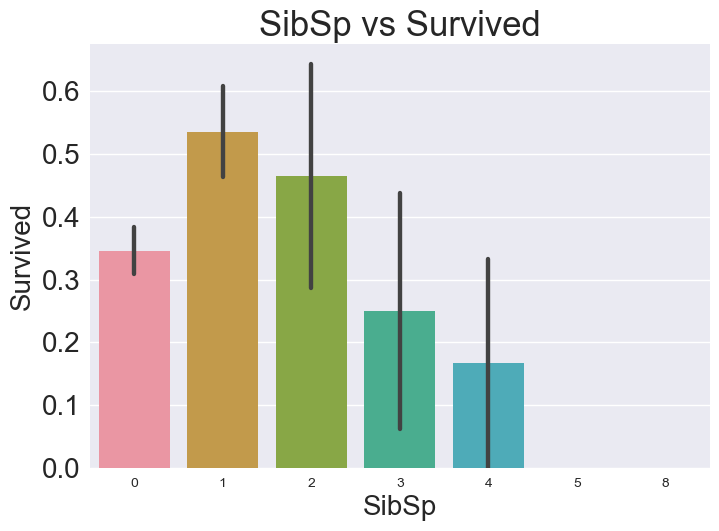

In [52]:
sns.barplot(x='SibSp', y='Survived', data = data)
plt.title('SibSp vs Survived')

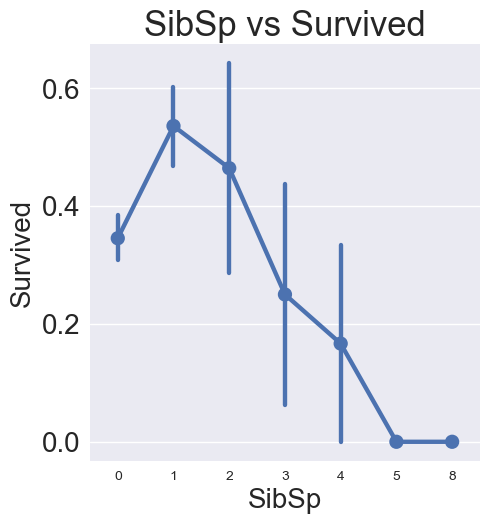

In [54]:
sns.catplot(x='SibSp', y='Survived', data = data, kind='point')
plt.title('SibSp vs Survived')
plt.show()

In [55]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [56]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


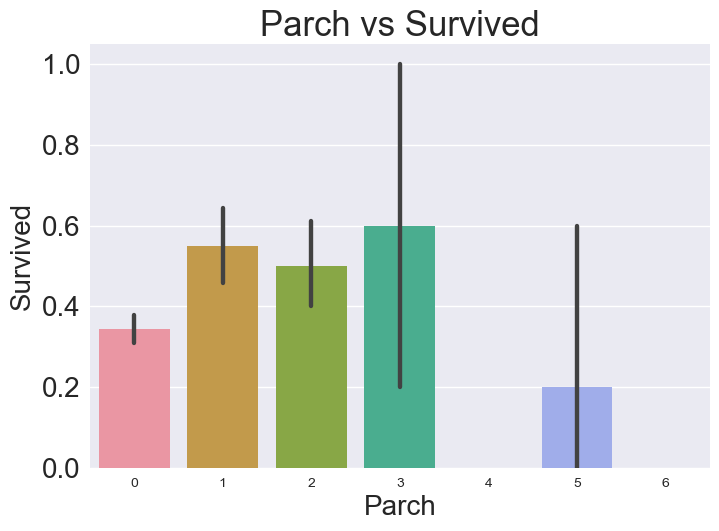

In [58]:
sns.barplot(x='Parch', y='Survived', data = data)
plt.title('Parch vs Survived')
plt.show()

C:\Users\Public\Anaconda3\envs\hana\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


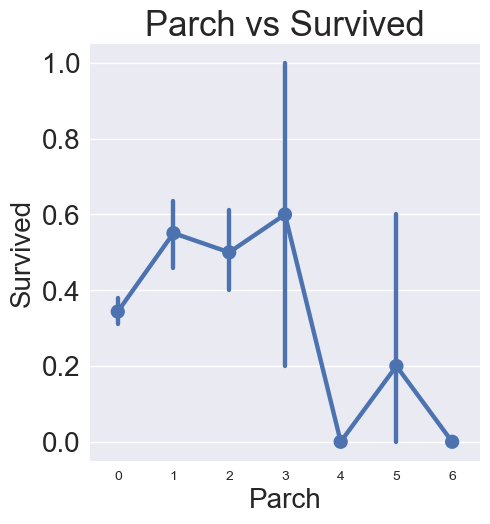

In [59]:
sns.catplot(x='Parch', y='Survived', data=data, kind='point', ax=ax[1])
plt.title('Parch vs Survived')
plt.show()

In [60]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


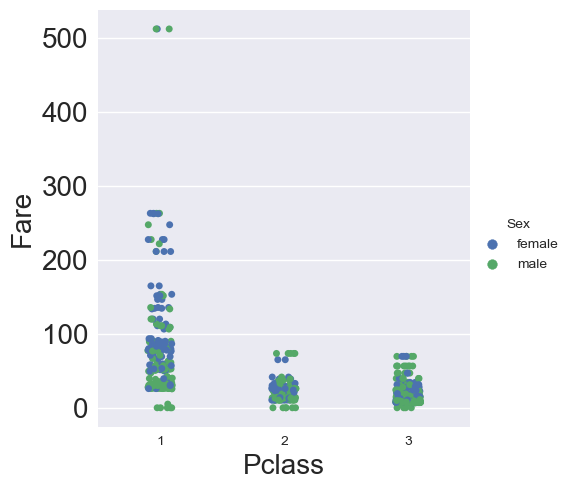

In [61]:
sns.catplot(x='Pclass', y='Fare', hue='Sex', data=data)

C:\Users\김하나\AppData\Local\Temp\ipykernel_16192\907661277.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0],color='r')
C:\Users\김하나\AppData\Local\Temp\ipykernel_16192\907661277.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Pclass']==2].Fa

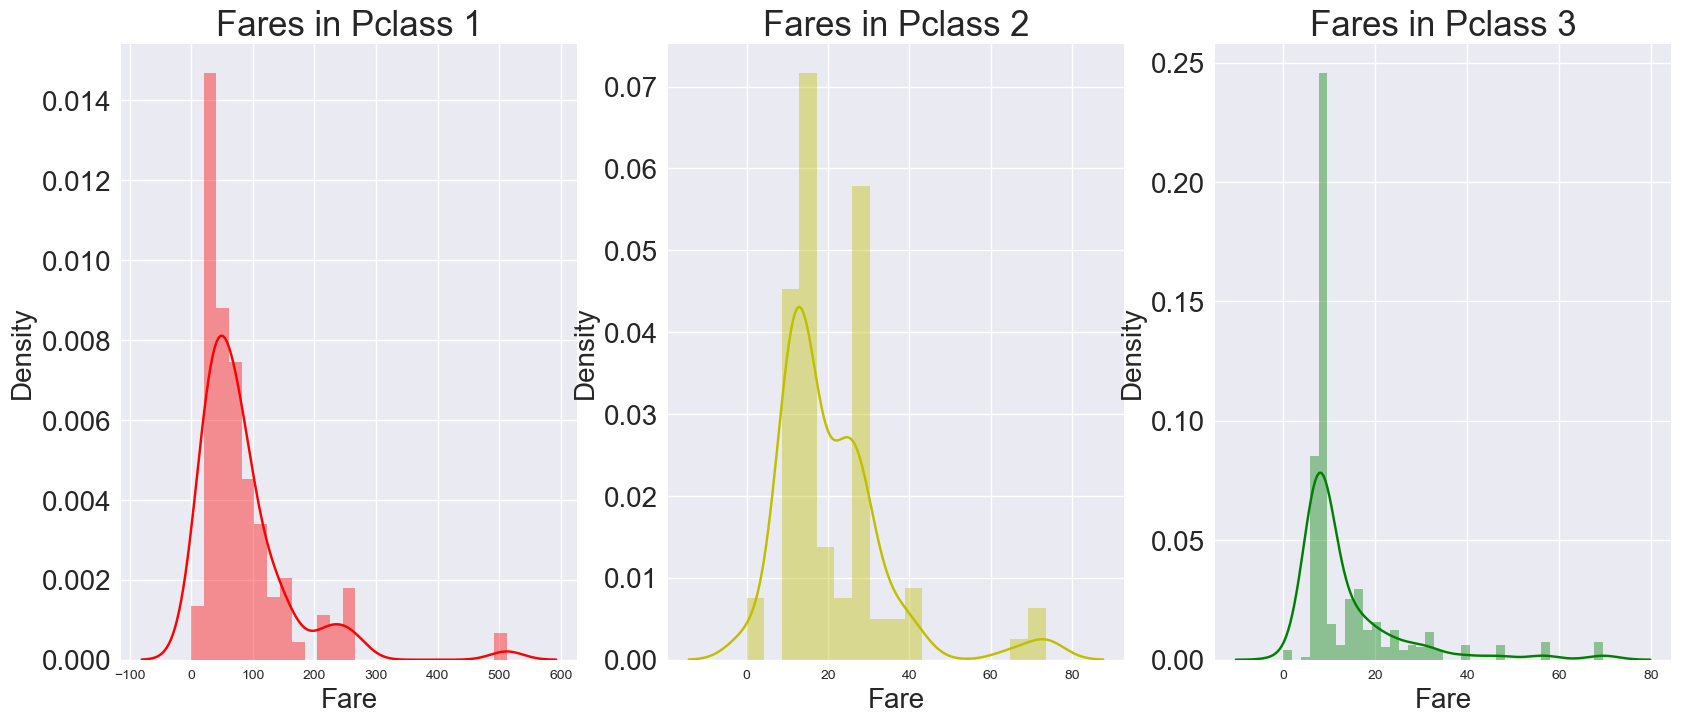

In [63]:
f, ax = plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0],color='r')
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1],color='y')
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2],color='g')
ax[2].set_title('Fares in Pclass 3')

plt.show()

C:\Users\김하나\AppData\Local\Temp\ipykernel_16192\3105650245.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)


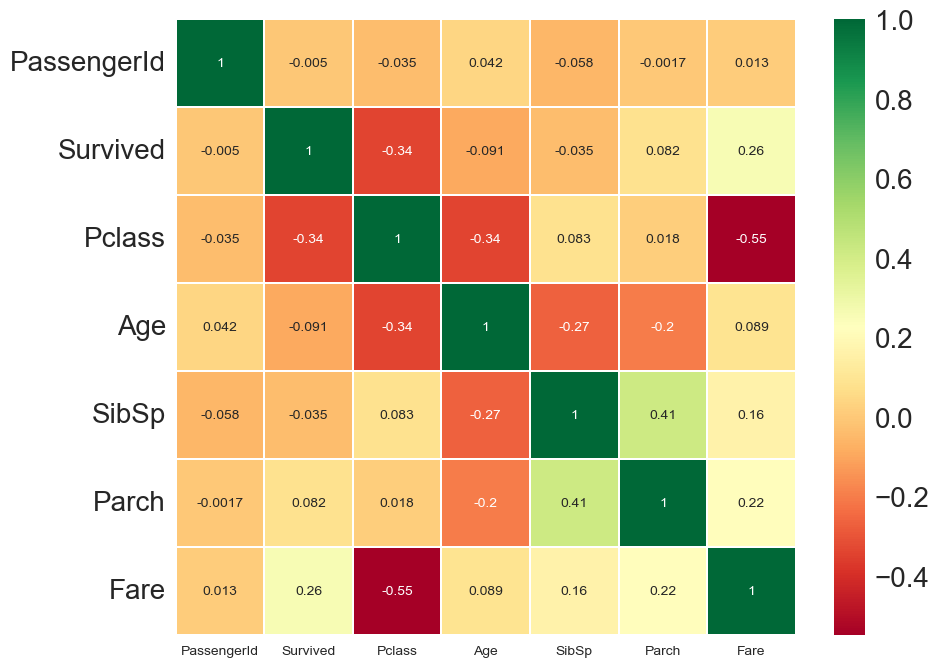

In [64]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [65]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [67]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


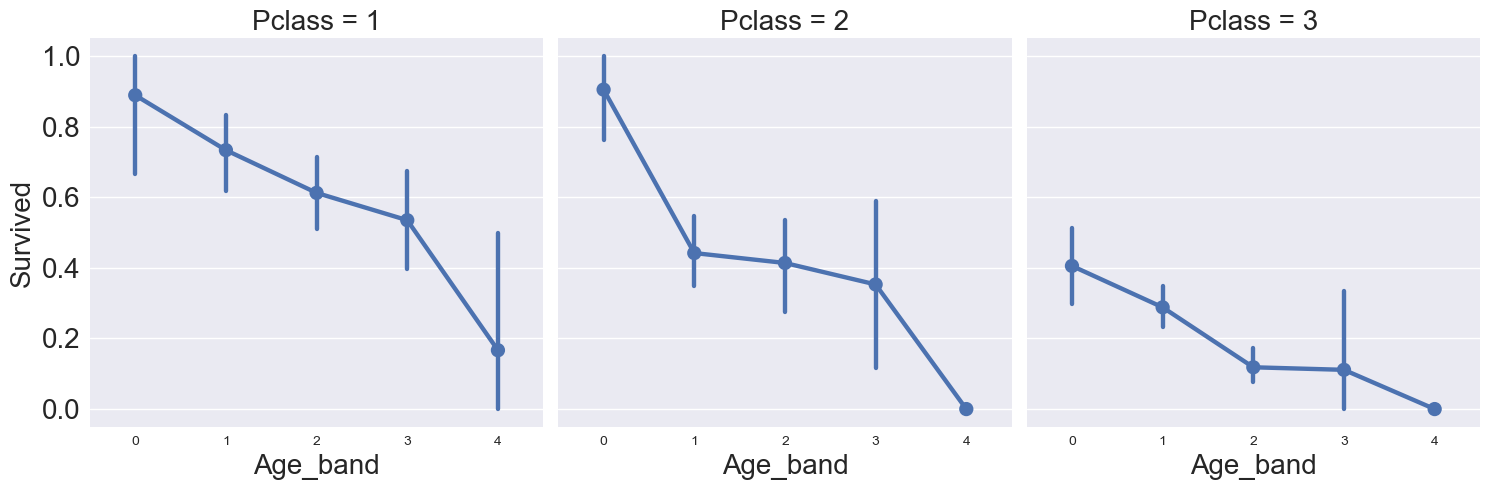

In [69]:
sns.catplot(data=data, x='Age_band', y='Survived', kind='point', col='Pclass')
plt.show()

C:\Users\Public\Anaconda3\envs\hana\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
C:\Users\Public\Anaconda3\envs\hana\lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)


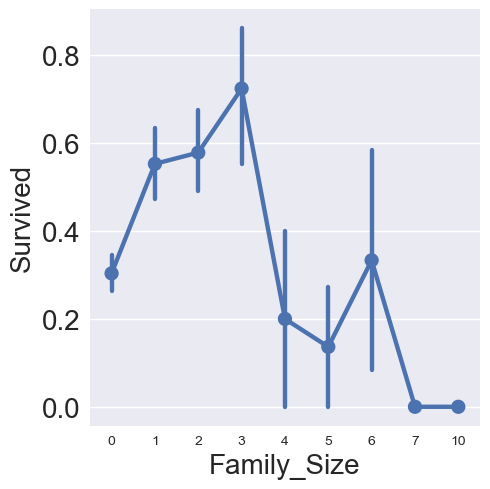

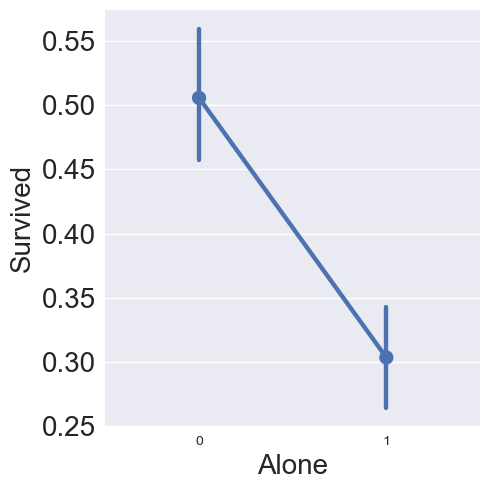

In [71]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

sns.catplot(x='Family_Size', y='Survived', data= data, ax=ax[0], kind='point')
ax[0].set_title('Family_Size vs Survived')

sns.catplot(x='Alone', y='Survived', data= data, ax=ax[1], kind='point')
ax[1].set_title('Alone vs Survived')

plt.show()

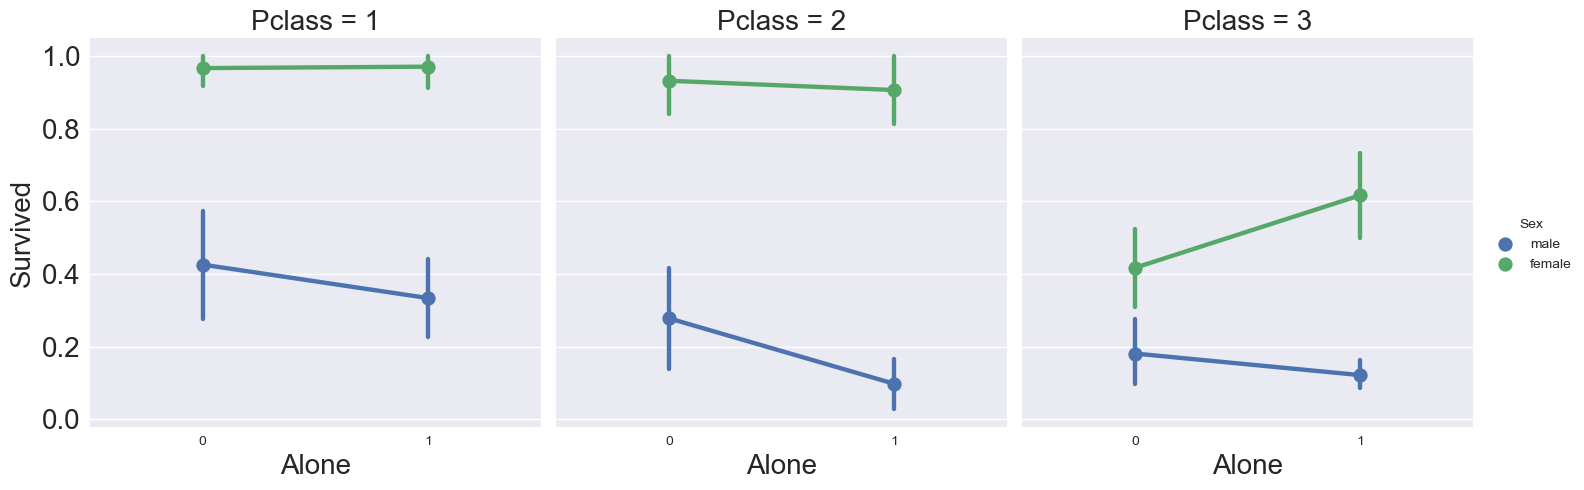

In [73]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

In [74]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [75]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

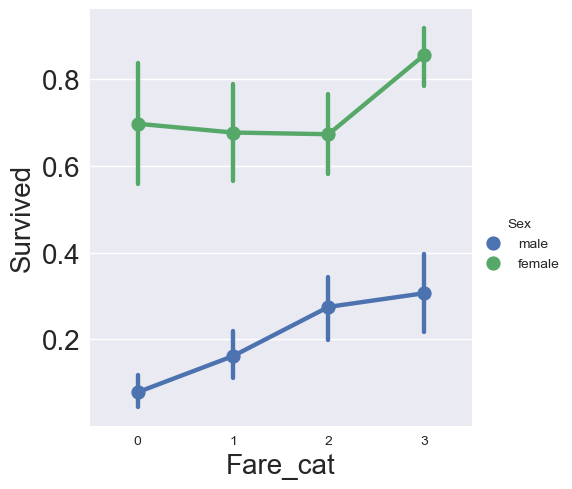

In [76]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue="Sex", kind='point')
plt.show()

In [77]:
data['Sex'].replace(['male', 'female'], [0,1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace = True)
data["Initial"].replace(['Mr', "Mrs", "Miss", "Master", "Other"], [0,1,2,3,4], inplace = True)

In [78]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Initial', 'Age_band',
       'Family_Size', 'Family_size', 'Alone', 'Fare_Range', 'Fare_cat'],
      dtype='object')

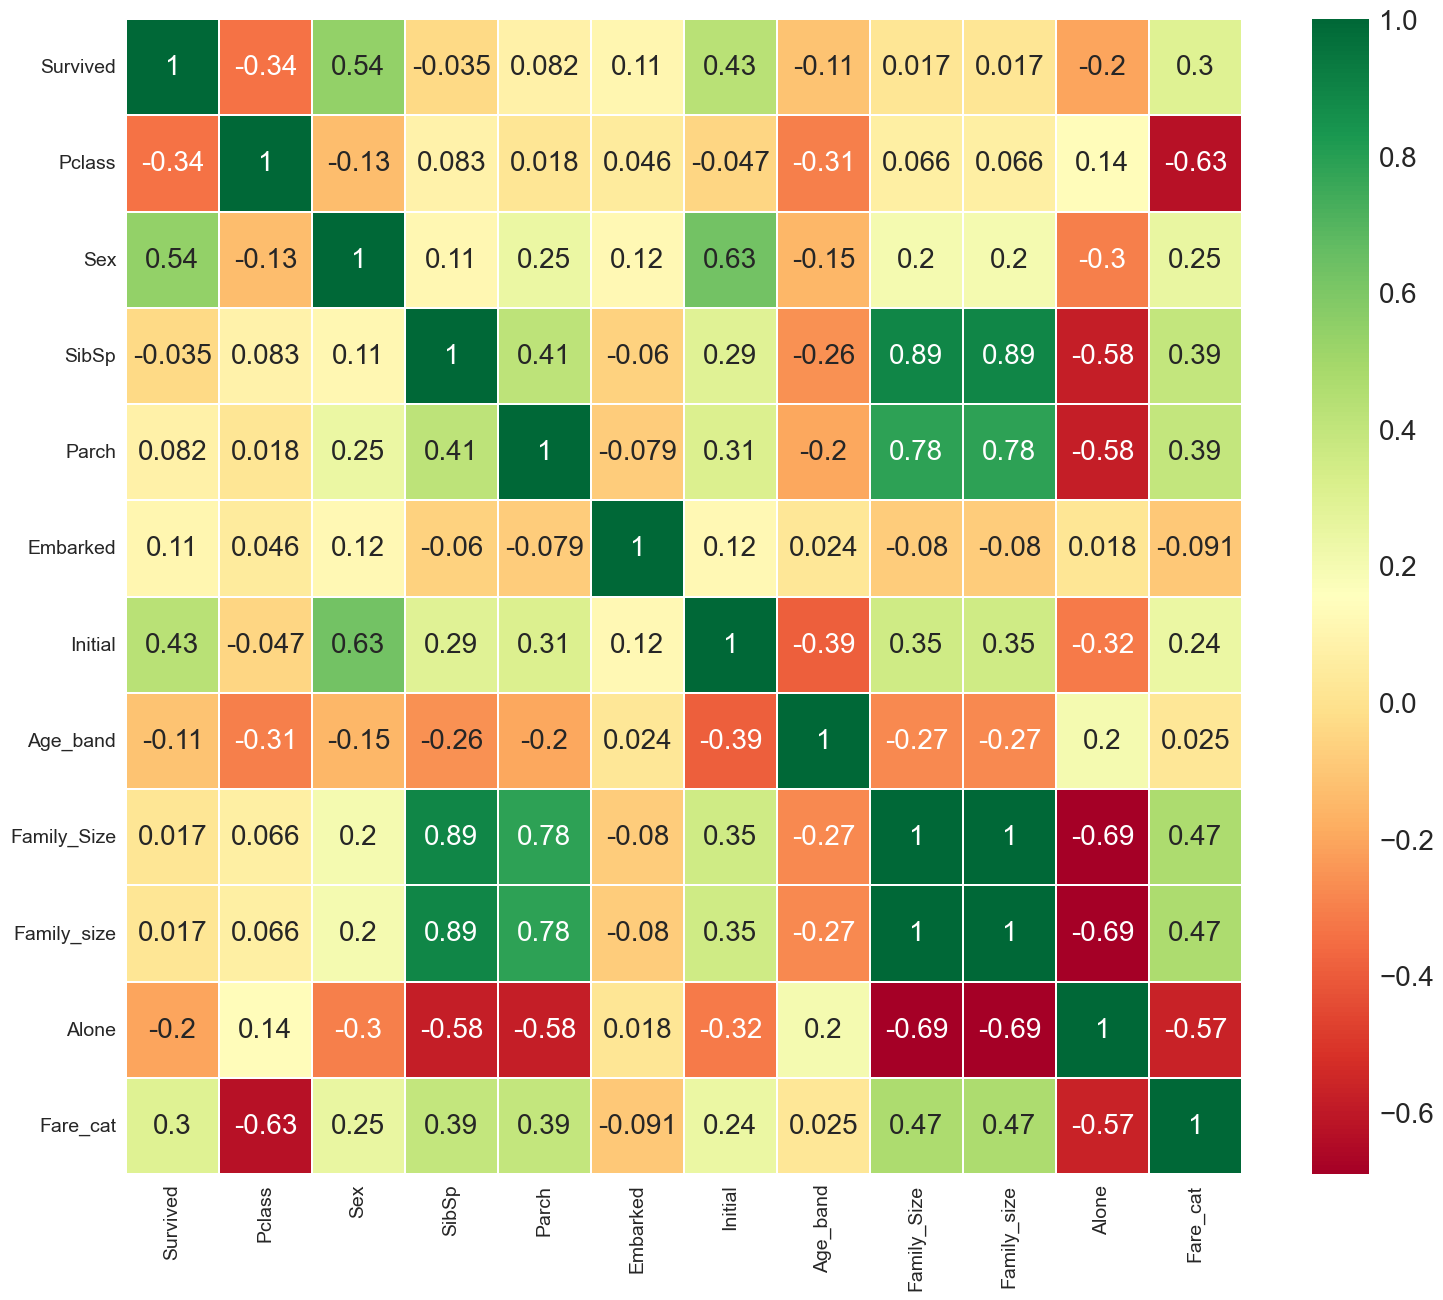

In [79]:
data.drop( ['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'],
    axis=1,inplace=True)
sns.heatmap(data.corr(),
            annot=True,
            cmap='RdYlGn',
            linewidths=0.2,
            annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [80]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(axis=0), columns=['A', 'B', 'C', 'D'],
                 index = np.arange(0,100,10))
df

,A,B,C,D
0,-1.187097,-0.222255,-0.886909,0.183764
10,-0.434694,1.378813,-2.077579,0.648945
20,-0.571844,1.446312,-1.406204,1.554850
30,-1.461545,1.352442,-1.185621,3.627100
40,-2.673655,1.199205,-4.372965,3.755753
50,-3.739152,0.850030,-4.369097,2.429899
60,-3.627047,2.305708,-2.883693,4.061745
70,-3.146895,1.160502,-1.561462,2.327168
80,-2.409827,0.662432,-0.304197,1.989528
90,-3.042793,0.494048,-2.608913,1.705944


<Axes: >

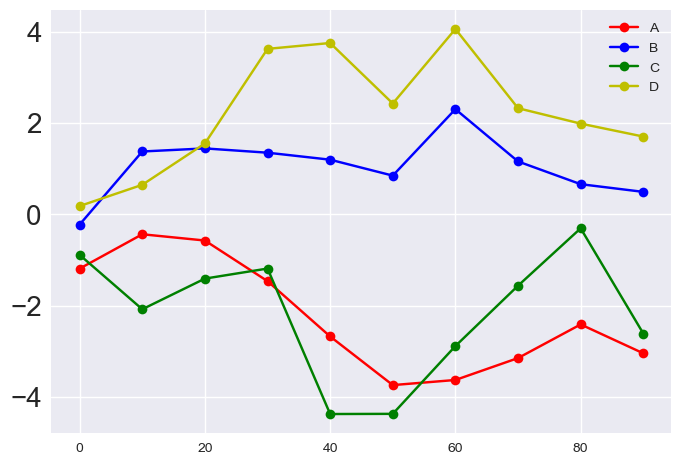

In [81]:
df.plot(marker='o', color=['r','b','g','y'])

In [82]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


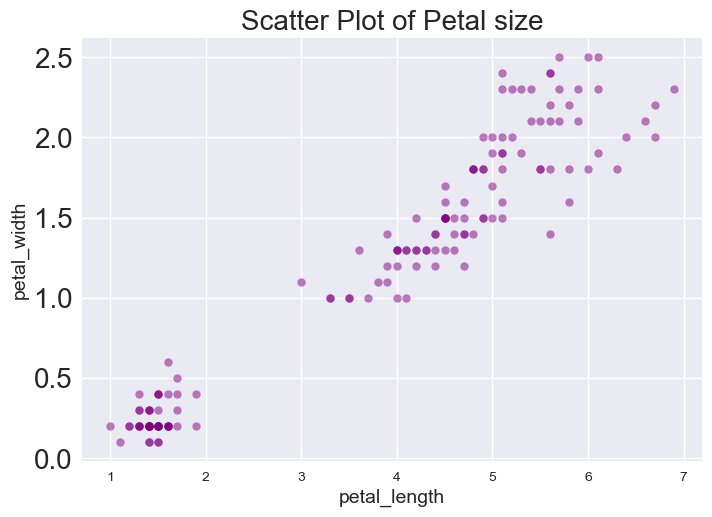

In [83]:
plt.plot('petal_length', 'petal_width',data=iris, linestyle='none',
        marker='o', markersize=6, color='purple', alpha=0.5)

plt.title('Scatter Plot of Petal size', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.show()

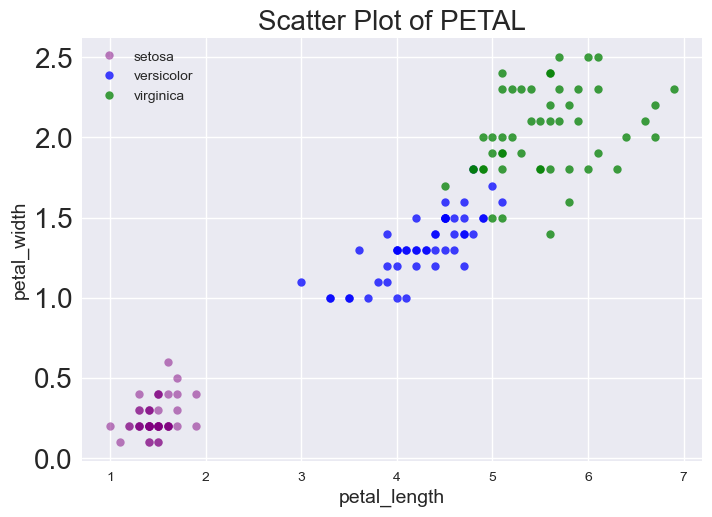

In [84]:
plt.plot('petal_length',
         'petal_width', 
         data=iris[iris['species']=='setosa'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='purple', 
         alpha=0.5)
plt.plot('petal_length', 
         'petal_width',
         data=iris[iris['species']=='versicolor'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='blue', 
         alpha=0.75)
plt.plot('petal_length',
         'petal_width', 
         data=iris[iris['species']=='virginica'],
         linestyle='none', 
         marker='o', 
         markersize=6,
         color='green', 
         alpha=0.75)
plt.title('Scatter Plot of PETAL', fontsize=20)
plt.xlabel('petal_length', fontsize=14)
plt.ylabel('petal_width', fontsize=14)
plt.legend(['setosa','versicolor', 'virginica'])
plt.show()

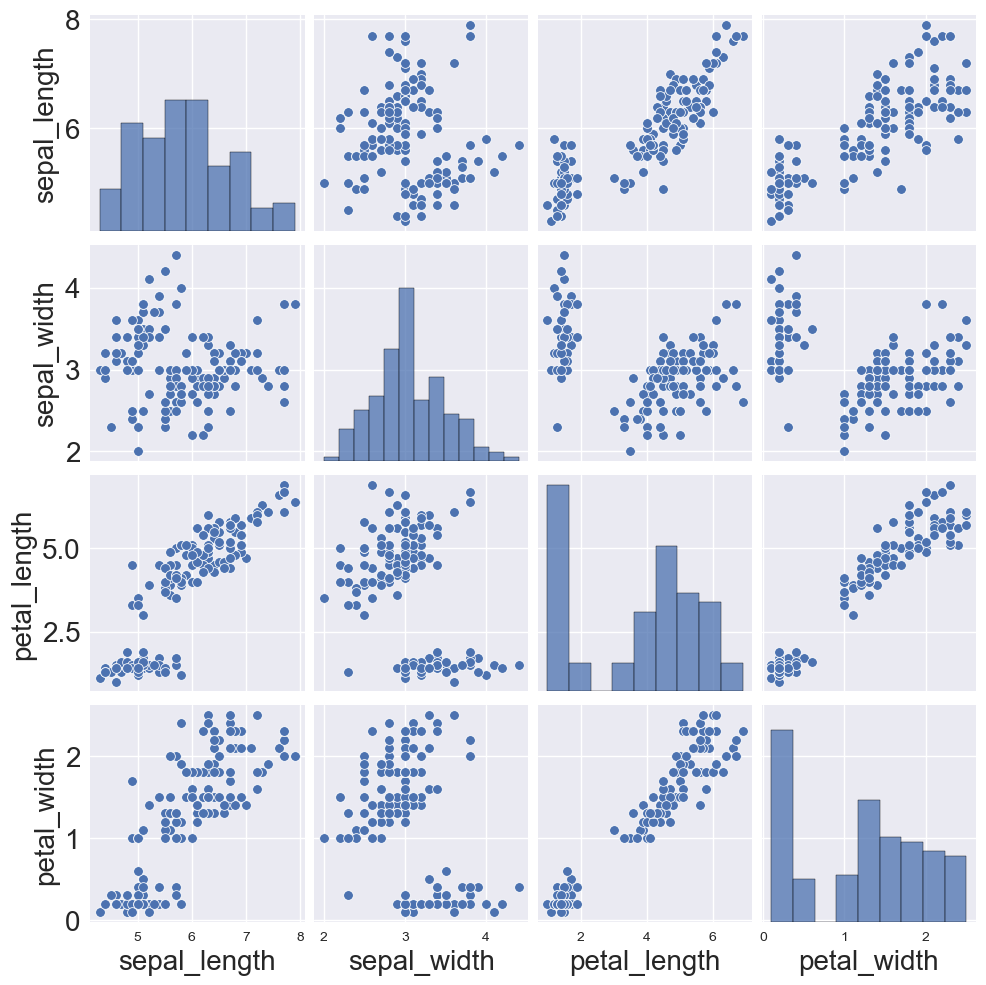

In [85]:
sns.pairplot(iris)

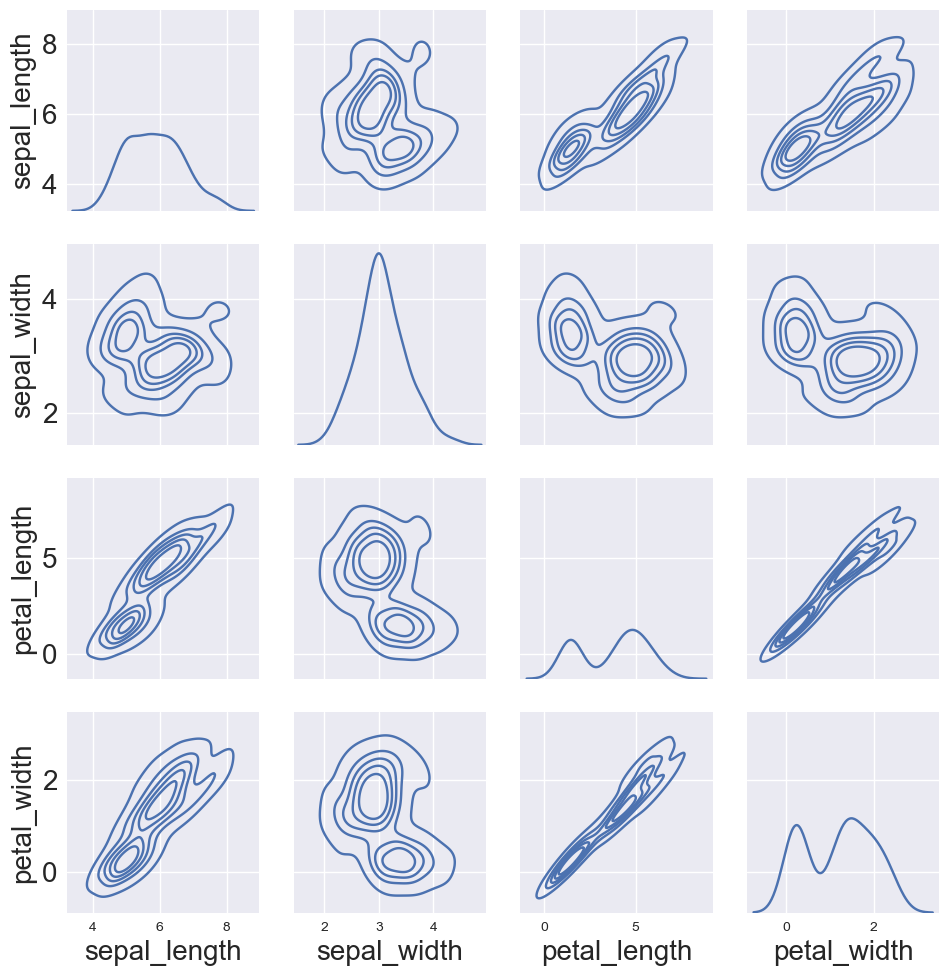

In [86]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

In [87]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [88]:
fish_data= np.column_stack((fish_length, fish_weight))
fish_target= np.concatenate((np.ones(35), np.zeros(14)))
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

Text(0, 0.5, 'weight')

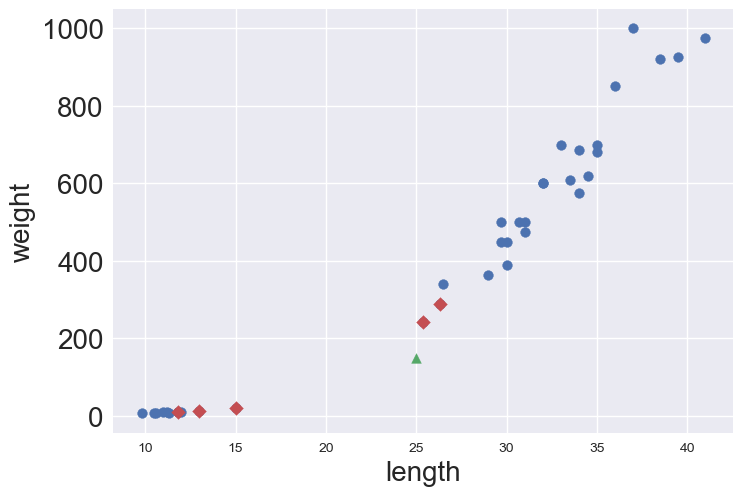

In [89]:
distances, indexes = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150,marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')

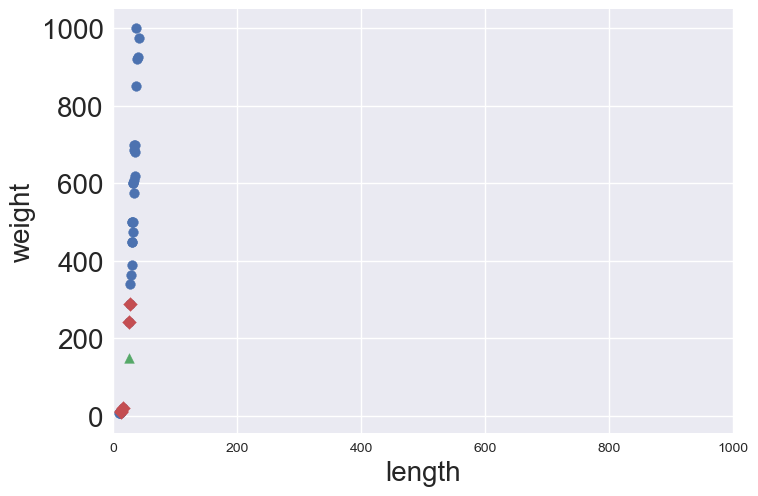

In [90]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0,1000))
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [91]:
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)
print(mean,std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


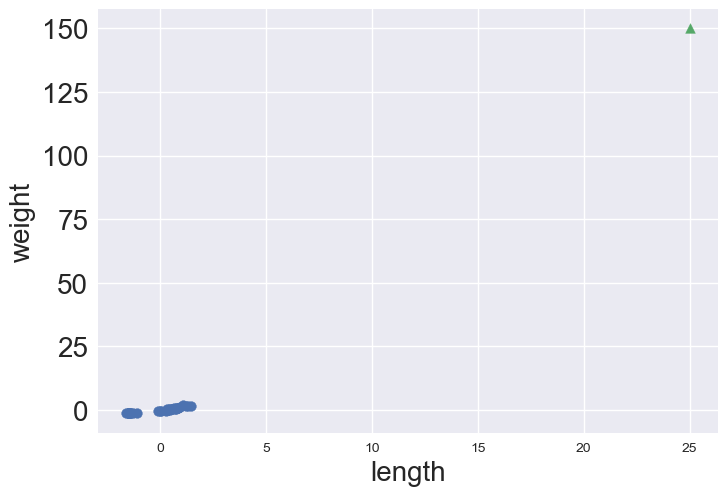

In [92]:
train_scaled=(train_input-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

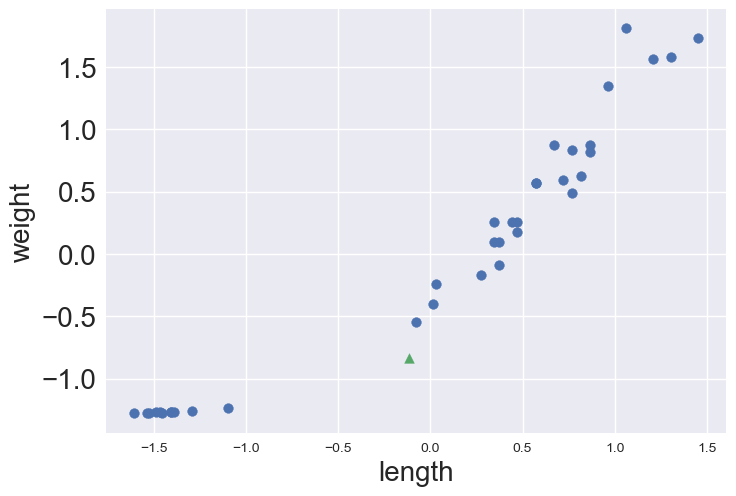

In [93]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

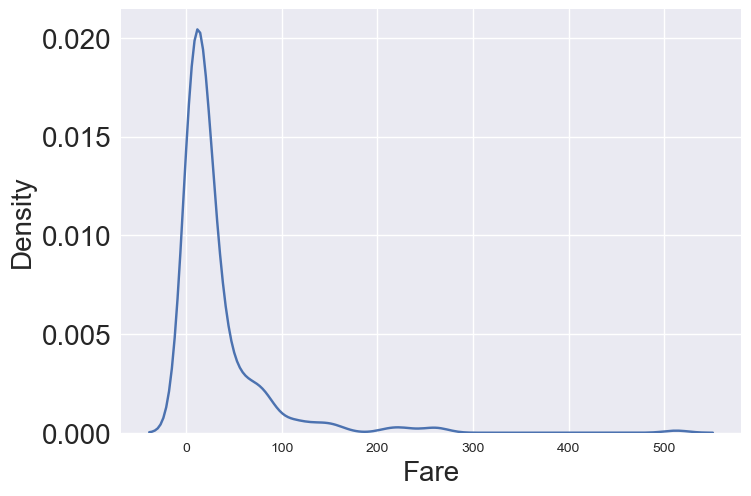

In [95]:
# 실습
data = pd.read_csv("C:/Users/김하나/Desktop/인사이트/Session 4. EDA/train.csv")
sns.kdeplot(data["Fare"])
plt.show()

In [96]:
data["Fare_band"] = pd.qcut(data["Fare"], q = 5, labels= ['A', 'B', 'C', 'D', 'E'])

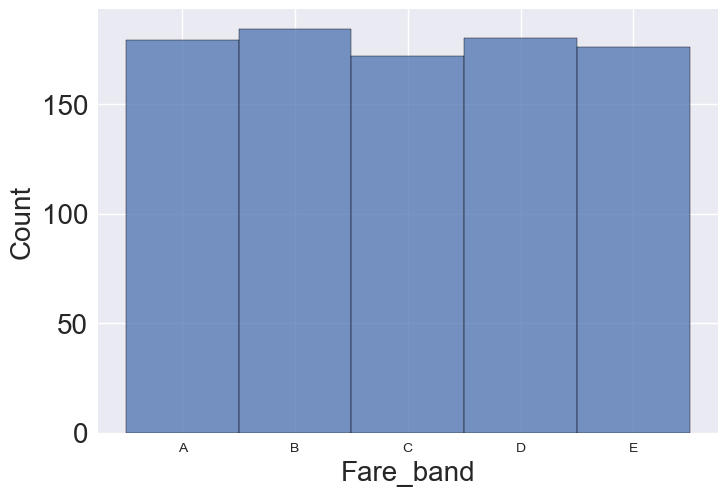

In [97]:
sns.histplot(data["Fare_band"])
plt.show()

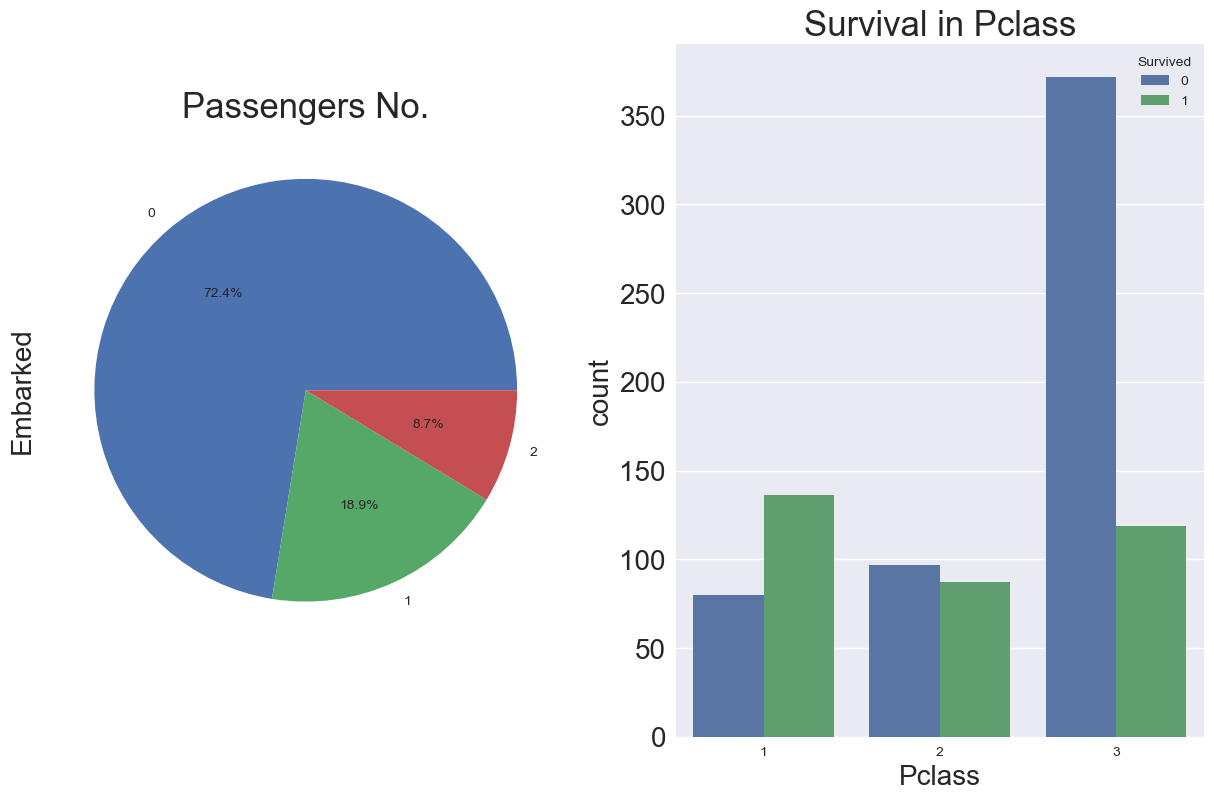

In [98]:
plt.figure(figsize = (15,9))
plt.subplot(1,2,1)
plt.title("Passengers No.")
plt.ylabel("Embarked")
plt.pie(data["Embarked"].value_counts(), labels = ['0','1','2'], autopct='%.1f%%') # EDA1에 있는 방법 사용

plt.subplot(1,2,2)
plt.title("Survival in Pclass")
plt.xlabel("Survival in Pclass")
sns.countplot(x = "Pclass", hue = "Survived", data = data)
plt.show()

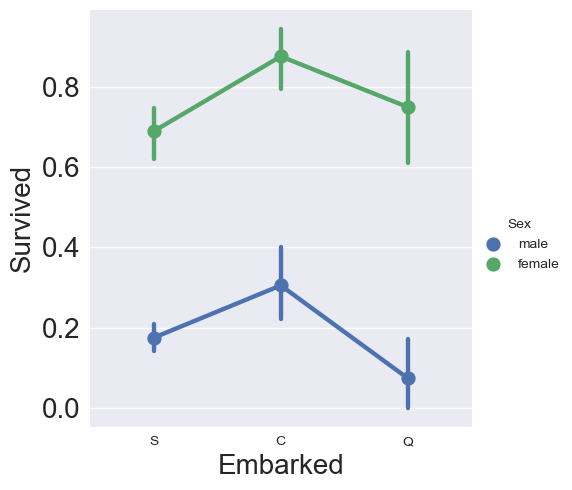

In [99]:
sns.catplot(x='Embarked', y='Survived', hue='Sex', kind ='point', data=data)